In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../Data/gdp_percapita.csv')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in gdp_d ? 7662 rows × 4 columns. What are the data types of each column? 

 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the 'Value Footnotes' column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.rename(columns={'Value':'GDP_Per_Capita','Country or Area':"Country"})

In [10]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [7]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [38]:
unique_years = gdp_df["Year"].nunique()
print(unique_years)

33


In [64]:
country_years = gdp_df.groupby(["Country"])["Year"].count()
print(country_years)

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [112]:
country_count_all = gdp_df.groupby("Country").filter(lambda x: x.Year.count()== unique_years)
print(country_count_all["Country"].nunique())

202


In [131]:
country_count_missing = gdp_df.groupby("Country").filter(lambda x: x.Year.count()!= unique_years)
country_unique = country_count_missing.groupby(["Country"])#.nunique()
print(country_unique["Country"].nunique())

Country
Afghanistan                  1
Aruba                        1
Bhutan                       1
Bosnia and Herzegovina       1
Cambodia                     1
Cayman Islands               1
Croatia                      1
CuraÃ§ao                     1
Djibouti                     1
Estonia                      1
Hungary                      1
Iceland                      1
Israel                       1
Kosovo                       1
Kuwait                       1
Latvia                       1
Lebanon                      1
Liberia                      1
Libya                        1
Lithuania                    1
Maldives                     1
Moldova                      1
Montenegro                   1
Nauru                        1
Other small states           1
Palau                        1
Qatar                        1
San Marino                   1
Serbia                       1
Sint Maarten (Dutch part)    1
Slovak Republic              1
Slovenia                     1


8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

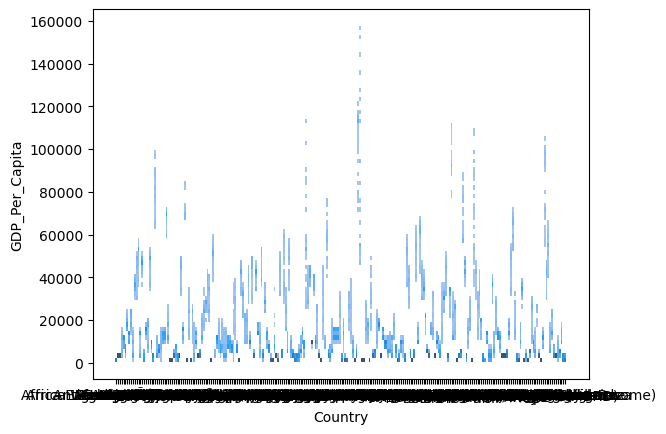

In [149]:
hist = sns.histplot(gdp_df,x = "Country", y = "GDP_Per_Capita")